In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


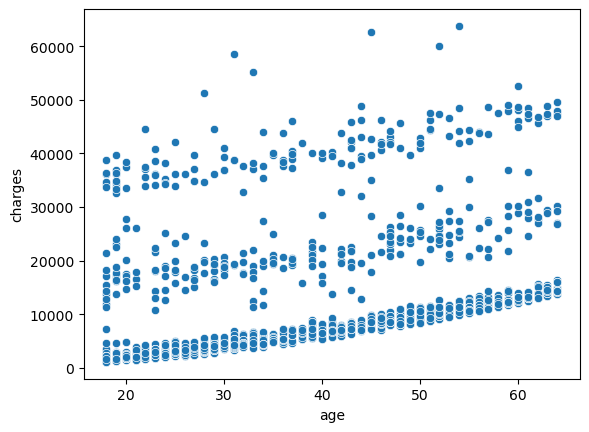

In [14]:
sns.scatterplot(data = df, x = "age", y = "charges")
plt.show()

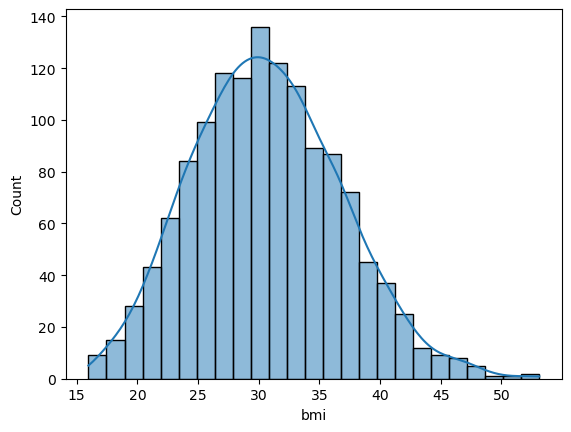

In [15]:
sns.histplot(data = df, x = "bmi", kde = True)
plt.show()

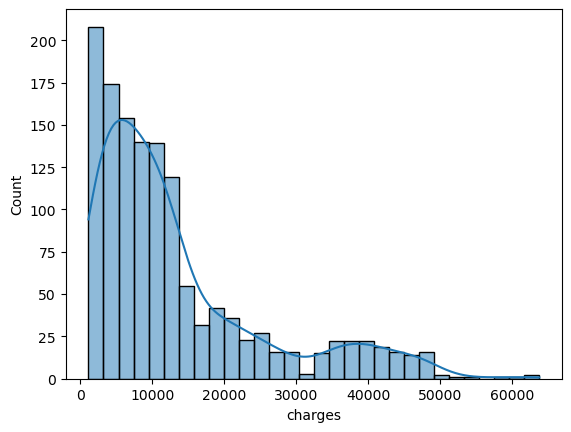

In [16]:
sns.histplot(data = df, x = "charges", kde = True)
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
X = df.drop("charges", axis = 1)
y = df["charges"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
categorical_cols = ["region"]
preprocessor = ColumnTransformer(transformers=
                                [
                                    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
                                ],remainder="passthrough"
                                )
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [25]:
X_train

array([[ 0.   ,  1.   ,  0.   , ..., 31.79 ,  2.   ,  1.   ],
       [ 0.   ,  0.   ,  1.   , ..., 29.1  ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 27.36 ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  1.   ,  0.   , ..., 24.42 ,  0.   ,  1.   ],
       [ 0.   ,  0.   ,  0.   , ..., 22.135,  2.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 30.78 ,  3.   ,  0.   ]])

In [26]:
from lightgbm import LGBMRegressor

In [27]:
model = LGBMRegressor()

In [28]:
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 8
[LightGBM] [Info] Start training from score 13374.181390


LGBMRegressor()

In [29]:
y_pred = model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("r2 score: ", r2_score(y_test, y_pred))
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))

r2 score:  0.871843376594573
mean squared error:  18458085.613847945
mean absolute error:  2770.071293021704


In [31]:
param_grid = {
    "num_leaves" : [31, 50, 70],
    "max_depth" : [-1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 300, 1000],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0],
    "reg_alpha" : [0, 0.5, 1.0],
    "reg_lambda" : [0, 0.5, 1.0]
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(verbosity = -1),
    param_distributions = param_grid,
    cv = 5,
    verbose=0,
    random_state=15,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

In [36]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.5, 1.0],
                                        'reg_lambda': [0, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=15, scoring='neg_root_mean_squared_error')

In [1]:
random_search.best_params_

NameError: name 'random_search' is not defined

In [39]:
y_pred = random_search.predict(X_test)

In [40]:
print("r2 score: ", r2_score(y_test, y_pred))
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))

r2 score:  0.8858097014961821
mean squared error:  16446549.93278381
mean absolute error:  2483.917697926393


In [41]:
from scipy.stats import boxcox

In [42]:
 y_train_transformed, lambda_y = boxcox(y_train)

In [43]:
y_train_transformed

array([15.21106982, 10.76906508, 14.18387955, ..., 13.82797268,
       12.12777291, 12.48181972])

In [49]:
def inverse_boxcox(y, lambda_):
    if lambda_ ==0:
        return np.exp(y)
    else:
        return np.power(y*lambda_ + 1, 1 / lambda_)

In [50]:
model = LGBMRegressor()
model.fit(X_train, y_train_transformed)
y_pred_transformed = model.predict(X_test)
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [51]:
print("r2 score: ", r2_score(y_test, y_pred_original))
print("mean squared error: ", mean_squared_error(y_test, y_pred_original))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred_original))

r2 score:  0.8925898035961266
mean squared error:  15470028.378876308
mean absolute error:  2129.19354753348
